# PHYS 581 - Assignment 1
## Siegfried Peschke - 30032136
### January 19, 2021

In this assignment we explore utilizing principal component analysis and singular spectrum analysis to learn about main trends in a sample data set.

In [1]:
#Import Libraries
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
#Load datafile
workfilename = 'omni_1hour.npz'
test = np.load( workfilename )
#print(list(test.keys()))
data = test['omni']
datetime = data['year'] + data['day'] / 365.0

Text(0, 0.5, 'F10.7 index')

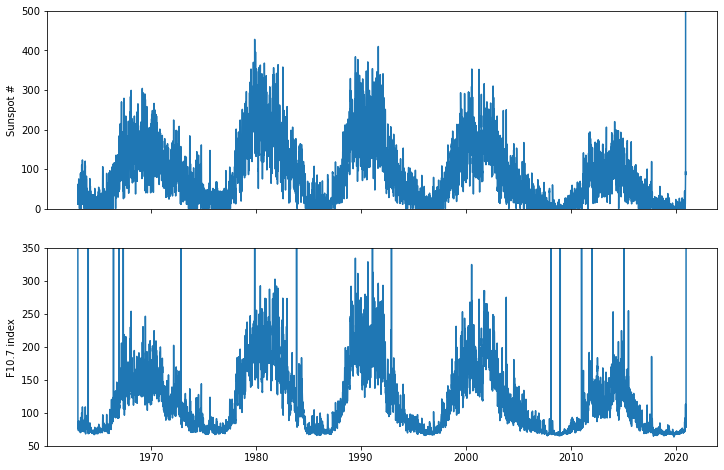

In [3]:
#Plotting sunspot number and f10.7 index
fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

plt.sca(axes[0])
plt.plot(datetime, data['sunspot_number'])
plt.ylim(0,500)
plt.ylabel('Sunspot #')

plt.sca(axes[1])
plt.plot(datetime, data['f107_index'])
plt.ylim(50,350)
plt.ylabel('F10.7 index')

In [4]:
def principal_component_analysis(A):
    # Center and Normalize the matrix
    C = (A - np.mean(A, axis=1).reshape(-1,1))/np.std(A, axis=1).reshape(-1,1)
    #print(C)
    # Find the covariance matrix of C
    V = np.cov(C)
    #print(V)
    # Eigendecomposition of the covariance matrix
    eigenval, eigenvec = np.linalg.eig(V)
    
    # Sort eigenvalues in descending order
    sidx = np.argsort(eigenval)[::-1]
    eigenval, eigenvec = eigenval[sidx], eigenvec[:,sidx]
    
    result = dict(eigval=eigenval, eigvec=eigenvec, fraction=eigenval/np.sum(eigenval))
    return result

In [5]:
#Apply PCA to daily SSN and f10.7 index
datavector = np.array([data[name] for name in ['sunspot_number','f107_index']])
PCA_result = principal_component_analysis(datavector)
print(PCA_result['eigval'])
print(PCA_result['eigvec'])
print(PCA_result['fraction']*100)

[1.81828227 0.18172166]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[90.91393483  9.08606517]


Principle component analysis of the daily sunspot number and f10.7 index dataset reveals a primary component responsible for $91\%$ of the variance and a second component responsible for the remaining $9\%$ of the explained variance. Taking the projection onto the first coordinate axis, a $1D$ line determined by the principal eigenvector, would lose only a minimal amount of information in the process. Thus it is safe to conclude that a large amount of the information in the daily sunspot number and f10.7 index is shared.

In [7]:
def singular_spectrum_analysis(A, N=5000, d=30):
    # Generate Lag matrix
    L = np.empty((d,N), dtype=float)
    for i in range(d):
        L[i] = A[i:N+i]
    return L, principal_component_analysis(L)
    
lagMatrix, SSA_result = singular_spectrum_analysis(data['sunspot_number'][-100000:])
#print(SSA_result['eigval'])
#print(SSA_result['eigvec'])
print(SSA_result['fraction'][0:5]*100)

[94.95234929  3.09522302  0.74636723  0.35421148  0.18680702]


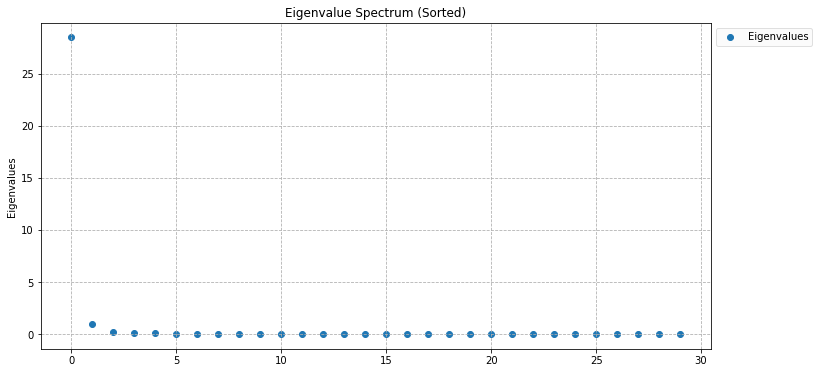

In [8]:
#Gridlines
plt.figure(figsize=(12,6))
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('')
plt.ylabel('Eigenvalues')
plt.title("Eigenvalue Spectrum (Sorted)")

#Create the values to be plotted
x = range(len(SSA_result['eigval']))

#Plot the data points
plt.scatter(x, SSA_result['eigval'], label = 'Eigenvalues')

#Legend
legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
    
plt.show()

The eigenvalue spectrum resulting from the singular spectrum analysis of the daily sunspot number using a window length of $L = 30$ reveals a primary component responsible for $95\%$ of the variance and respresents the main trend in the data series. The secondary component is responsible for $3\%$ of the variance and respresents periodic components. The remaining components contribute very little to information in the data and are considered responsible for noise.

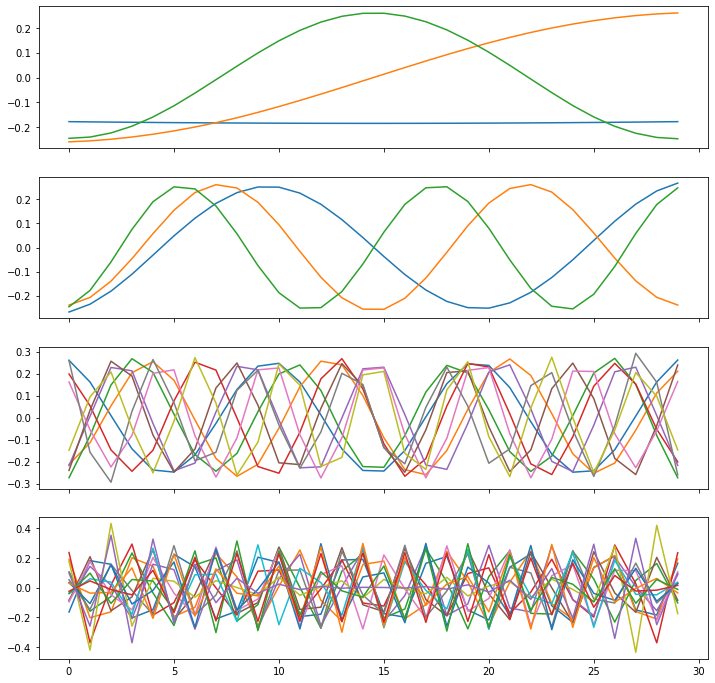

In [9]:
#Create the values to be plotted
x = range(len(SSA_result['eigvec']))

fig, axes = plt.subplots(4, 1, figsize=(12,12), sharex=True)

plt.sca(axes[0])
plt.plot(x, SSA_result['eigvec'][:, 0:3])

plt.sca(axes[1])
plt.plot(x, SSA_result['eigvec'][:, 3:6])

plt.sca(axes[2])
plt.plot(x, SSA_result['eigvec'][:, 6:15])

plt.sca(axes[3])
plt.plot(x, SSA_result['eigvec'][:, 15:30])

Information derived from the eigenvalues is confirmed by plotting the eigenvectors frequency domain. The component identified to be the primary component indeed has a flat, non-zero frequency domain which is expected as the primary eigenvector is responsible for the main trend of the data series. From the eigenvalue spectrum we can determine that singular spectrum analysis can produce a primary component responsible for more of the information in the sunspot data series than principal component analysis and correlation between sunspot number and f10.7 index.